# A tiny neural net from scratch

This week we will built a very small neural net from scratch.

### Instructions

**Part 1**:
Your goal in this part is to solve a regression problem using a neural net with a single hidden layer of 2 neurons.
Add your code to the large cell below that at the two points where you see YOUR CODE HERE.
Do not modify any other code.  Please note that bias weights are used.

You will also need to add code at the YOUR CODE HERE within the predict() method.

When your code is working you should be able to get an RMSE value not much larger than the RMSE from LinearRegression in Scikit-Learn, and a lot better than the baseline RMSE.  Be sure to experiment with learning rate and number of training steps.

**Part 2**:
Your goal in this part is to generalize your solution in part 1 so that it works with any number of neurons in the hidden layer.  Insert your code in the three cells at the bottom of the file.

Modify this file only in the places marked with YOUR CODE HERE.  Don't import other packages.

In [ ]:
# Do not import any other packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# for repeatability
np.random.seed(0)

### Data sets

Data set 1: heart disease data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/heart.csv")

def heart_data():
    predictors = ['age', 'restbp', 'chol']
    target = 'maxhr'
    X_train = df[predictors].values
    y_train = df[target].values

    # scale the data
    X_train = StandardScaler().fit_transform(X_train)

    return X_train, y_train

Data set 2: synthetic linear data

In [ ]:
def synthetic_data():
    w0 = 2
    w1 = 1.2
    n = 300
    x = np.random.rand(n)*10
    y = w0 + w1*x + np.random.normal(size=n)*0.8

    X_train = x.reshape((n, 1))
    X_train = StandardScaler().fit_transform(X_train)
    y_train = y
    
    return X_train, y_train

Plot synthetic data

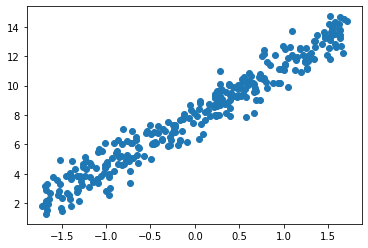

In [ ]:
X_train, y_train = synthetic_data()
plt.scatter(X_train[:,0], y_train);

#### Basic components of a neural net.

In [ ]:
def mse(y, y_pred):
    return 0.5 * (y - y_pred)**2

def summation(w, x):
    return w.dot(x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def neuron(w, x):
    return sigmoid(w.dot(x))

### Two neurons plus summation plus MSE

#### Stochastic gradient descent

In [ ]:
# select the training data set
X_train, y_train = synthetic_data()
# X_train, y_train = heart_data()

In [ ]:
num_inputs = X_train.shape[1]
num_neurons = 2
learning_rate = 0.01
bias = np.array([1.0])

# initialize weights
w_neuron1   = np.random.rand(num_inputs+1)  - 0.5    # +1 is for the bias
w_neuron2   = np.random.rand(num_inputs+1)  - 0.5
w_summation = np.random.rand(num_neurons+1) - 0.5

z_sum = 0.0
loss_skip = 10
n_training_steps = 100
for i in range(n_training_steps):
    
    # pick a single random training example and add bias
    row = np.random.choice(X_train.shape[0])
    x = X_train[row]
    y = y_train[row]
    x1 = np.concatenate((bias, x))    
    #
    # feedforward
    #
    
    # - run the two neurons on x1, store the two outputs as array u
    # - add bias to u to get u1
    # - run the summation node on u1, to get output v
    # - compute the MSE using v and y, to get output z    
    u = np.array([neuron(w_neuron1, x1), neuron(w_neuron2, x1)])
    u1 = np.concatenate((bias, u))
    v = summation(w_summation, u1)
    z = mse(y, v)

    # report loss (averaged over loss_skip number of steps)
    z_sum += z
    if i > 0 and i % loss_skip == 0:
        print(z_sum/loss_skip)
        z_sum = 0.0

    #
    # backprop
    #
    
    # Your code will update the network weights:
    # 1. compute the partial derivative of z with respect to v
    pdz_v = v - y

    # 2. compute the partial derivative of z with respect to u, using your step 1 result
    pdz_u = pdz_v * u1

    # 3. compute the partial derivative of z with respect to the weights of the summation node
    pdz_ws = pdz_v * w_summation

    # 4. update the summation node weights (w_summation) in a gradient descent update step
    w_summation = w_summation - learning_rate * pdz_u

    # 5. compute the partial derivative of z with respect to the weights of neuron 1
    pdz_n1 = pdz_ws[0] * u1[1] * (1 - u1[1]) * x1

    # 6. compute the partial derivative of z with respect to the weights of neuron 2
    pdz_n2 = pdz_ws[0] * u1[2] * (1 - u1[2]) * x1

    # 7. update the neuron weights (w_neuron1, w_neuron2) in a gradient descent update step
    w_neuron1 = w_neuron1 - learning_rate * pdz_n1
    w_neuron2 = w_neuron2 - learning_rate * pdz_n2

    
 

46.02049340924597
26.960559527312245
19.412557902226037
11.751112966823225
11.156420895138455
12.066114948385408
2.6914215678658824
9.832954767736968
2.4095553897475908


#### Make predictions

In [ ]:
def predict(X_train, w_neuron1, w_neuron2, w_summation):
    m = X_train.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
       # YOUR CODE HERE
       # You will use your feedforward code here.
       x1 = np.concatenate((bias,  X_train[i]))
       u = np.array([neuron(w_neuron1, x1), neuron(w_neuron2, x1)])
       u1 = np.concatenate((bias,u))
       v = summation(w_summation, u1)
       y_pred[i] = v
       
    return y_pred

Compute RMSE for neural net, LinearRegression, and baseline.

In [ ]:
def rmse(y_pred, y_train):
    return np.sqrt(((y_pred - y_train)**2).mean())

def compare_RMSE(X_train, y_train, y_pred):
    """ Compare training RMSE for neural net (parameter y_pred), LinearRegression(), and baseline. """
    # linear regression
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred_sk = regr.predict(X_train)
    # baseline
    baseline = y_train.mean()
    rmse_base = np.sqrt(((baseline - y_train)**2).mean())
    
    print("RMSE, neural net: {:0.1f}".format(rmse(y_pred, y_train)))
    print("RMSE, LinearRegression: {:0.1f}".format(rmse(y_pred_sk, y_train)))
    print("RMSE, baseline: {:0.1f}".format(rmse(baseline, y_train)))

In [ ]:
y_pred = predict(X_train, w_neuron1, w_neuron2, w_summation)
compare_RMSE(X_train, y_train, y_pred)

RMSE, neural net: 3.5
RMSE, LinearRegression: 0.7
RMSE, baseline: 3.6
